In [1]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list further made in form of tuple , where first element is name of document and second is the text in documents.
#Y is the category

#change the path of dataset as required
X  =[] 
Y = []
for category in os.listdir("E:/Dont open/lectures/Data science/38. Project Text Classification/3.1. Solution/Datasets"):
    for document in os.listdir("E:/Dont open/lectures/Data science/38. Project Text Classification/3.1. Solution/Datasets/"+category):
        with open("E:/Dont open/lectures/Data science/38. Project Text Classification/3.1. Solution/Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#split has done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [7]:
#Example for showing re.split
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [8]:
#Making Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1


In [9]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122528),
 ('cmu', 39366),
 ('com', 37823),
 ('news', 25651),
 ('not', 25109),
 ('srv', 24276),
 ('cantaloupe', 19517),
 ('net', 19042),
 ('message', 16481),
 ('subject', 16242),
 ('lines', 15653),
 ('date', 15592),
 ('apr', 15379),
 ('newsgroups', 15300),
 ('path', 15250),
 ('can', 15012),
 ('organization', 14881),
 ('state', 14136),
 ('gmt', 13331),
 ('ohio', 11917),
 ('one', 11904),
 ('will', 11619),
 ('writes', 11006),
 ('article', 10084),
 ('comp', 9891),
 ('references', 9728),
 ('talk', 9199),
 ('misc', 8964),
 ('ans', 8324),
 ('howland', 8261),
 ('reston', 8227),
 ('sender', 8223),
 ('don', 8155),
 ('people', 7855),
 ('like', 7683),
 ('just', 7515),
 ('university', 7401),
 ('posting', 7332),
 ('nntp', 7035),
 ('know', 6917),
 ('mps', 6916),
 ('host', 6664),
 ('sci', 6588),
 ('get', 6502),
 ('think', 6341),
 ('zaphod', 6227),
 ('usenet', 6213),
 ('may', 6131),
 ('politics', 5889),
 ('alt', 5883),
 ('windows', 5714),
 ('also', 5654),
 ('time', 5374),
 ('rutgers', 5286),
 (

In [10]:
import matplotlib.pyplot as plt

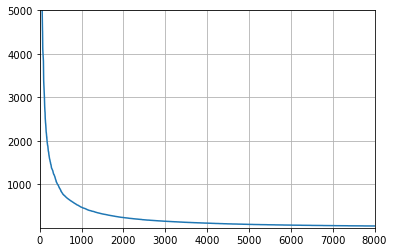

In [11]:
#Plotting graph on no. of words vs frequency 
#On basis of graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()  

In [12]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'reston',
 'sender',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'know',
 'mps',
 'host',
 'sci',
 'get',
 'think',
 'zaphod',
 'usenet',
 'may',
 'politics',
 'alt',
 'windows',
 'also',
 'time',
 'rutgers',
 'use',
 'harvard',
 'near',
 'eng',
 'new',
 'rec',
 'good',
 'sei',
 'crabapple',
 'well',
 'noc',
 'soc',
 'system',
 'xref',
 'das',
 'now',
 'even',
 'cis',
 'see',
 'europa',
 'gtefsd',
 'god',
 'world',
 'ece',
 'uunet',
 'religion',
 'way',
 'org',
 'say',
 'two',
 'much',
 'first',
 'christian',
 'many',
 'make',
 'gov',
 'rochester',
 'right',
 'distribution',
 'club',
 'said',
 'space',
 'max',
 'want',
 'gatech',
 'mail',
 'andrew',
 'reply',


In [13]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [15]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[13  3  1 ...  0  0  0]
 [10  3  1 ...  0  0  0]
 [ 7  1  1 ...  0  0  0]
 ...
 [10  4  0 ...  0  0  0]
 [ 7  5  6 ...  0  0  0]
 [11  1  0 ...  0  0  0]]
--------------------------
[[11  4  3 ...  0  0  0]
 [ 9  1  0 ...  0  0  0]
 [12  4  0 ...  0  0  0]
 ...
 [ 5  3  3 ...  0  0  0]
 [11  2  0 ...  0  0  0]
 [ 2  1  0 ...  0  0  0]]


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [17]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.8944455557778223
Score on testing data: 0.8548
[[207   0   0   0   1   0   1   3   3   0   0   0   0   0   1   2   0   2
    0  52]
 [  0 198  16  16  13  11   8   1   0   1   0   0   4   1   0   0   0   0
    0   0]
 [  0   2 202  15   2  18   5   1   0   0   0   1   0   1   0   0   0   0
    0   0]
 [  0   4   4 188  26   1   2   2   0   0   0   1   4   0   0   0   0   0
    0   0]
 [  0   1   1  18 218   0   5   0   0   0   0   0   2   0   1   0   0   0
    0   0]
 [  0  20  14   6   8 172   6   0   0   0   0   1   3   1   2   0   0   0
    0   0]
 [  0   1   0   1   4   1 241   6   1   0   0   0   2   0   2   0   0   0
    0   0]
 [  0   0   0   0   1   0   7 244   3   0   1   0   3   0   3   0   2   0
    1   0]
 [  0   0   0   0   0   0   3   3 247   1   0   0   0   0   2   0   0   0
    0   0]
 [  0   0   0   0   1   0   3   2   5 220  16   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   1   1   1   4   3 234   0   0   1   0   0   0   0
   